In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
import keras_ocr
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite("text_free_image.jpg",img_rgb)
    return(img)

inpaint_text("test_image_output.jpg",pipeline)

Lossy conversion from float64 to uint8. Range [-0.4176584313725491, 0.34705882352941175]. Convert image to uint8 prior to saving to suppress this warning.


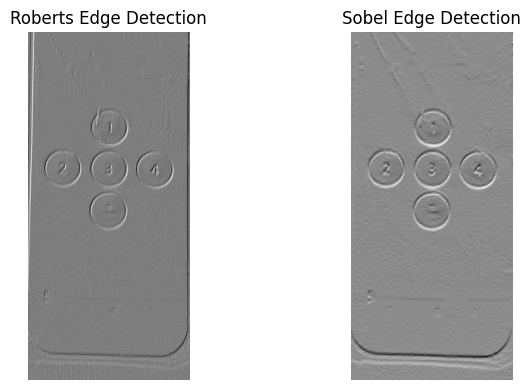

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
import skimage.io

filename = os.path.join(skimage.data_dir, r'D:/remoteControlDetection/remote-control-detection/text_free_image.jpg')

image = skimage.io.imread(fname=filename, as_gray=True)
edge_roberts = filters.roberts_pos_diag(image)
edge_sobel = filters.sobel_h(image)

skimage.io.imsave("sobel.jpg",edge_sobel)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [226]:
import cv2
import numpy as np
  
# Read image.
detectedCirclesNumber = 0
img = cv2.imread('sobel.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  

# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        # cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        detectedCirclesNumber +=1
print(detectedCirclesNumber) 
cv2.imshow("Detected Circle", img)
cv2.waitKey(0)
cv2.imwrite("detectedOutput.jpg",img)

5


True

In [204]:
import cv2

# Read the original image
img = cv2.imread('text_free_image.jpg') 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

<built-in method all of numpy.ndarray object at 0x0000021B2D6BD7B0>


c:\Users\BAHTIYAR\anaconda3\envs\image_env\lib\site-packages\ipykernel_launcher.py:22: UserWarning: canny.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


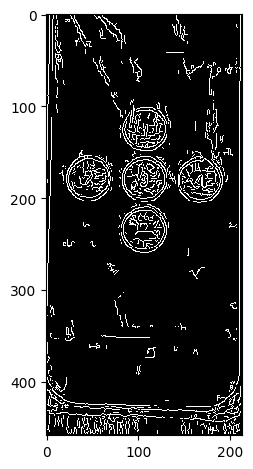

In [227]:
import skimage.io
import skimage.feature
import sys
import os
# read command-line arguments
filename = os.path.join(skimage.data_dir, r'D:/remoteControlDetection/remote-control-detection/text_free_image.jpg')
sigma = 0
low_threshold = 0.1
high_threshold = 0.2

image = skimage.io.imread(fname=filename, as_gray=True)
skimage.io.imshow(image)
edges = skimage.feature.canny(
    image=image,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)
print(edges.all)

skimage.io.imshow(edges)
skimage.io.imsave("canny.jpg",edges)


In [202]:
import cv2
import numpy as np

img = cv2.imread('text_free_image.jpg')
original = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    print(len(approx))
    if len(approx)==5:
        print("Blue = pentagon")
        cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print("Green = triangle")
        cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print("Red = square")
        cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 6:
        print("Cyan = Hexa")
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)
    elif len(approx) == 8:
        print("White = Octa")
        cv2.drawContours(img,[cnt],0,(255,255,255),-1)
    elif len(approx) > 12:
        print("Yellow = circle")
        cv2.drawContours(img,[cnt],0,(0,255,255),-1)

cv2.imshow('image', img)
cv2.imshow('Binary',thresh)
cv2.waitKey()

18
Yellow = circle
12
12
20
Yellow = circle
16
Yellow = circle
17
Yellow = circle
1
24
Yellow = circle
20
Yellow = circle
9
15
Yellow = circle
15
Yellow = circle
11
1
15
Yellow = circle
1
2
1
5
Blue = pentagon
1
18
Yellow = circle
11
1
1
1
21
Yellow = circle
22
Yellow = circle
1
13
Yellow = circle
15
Yellow = circle
1
2
1
1
2
11
16
Yellow = circle
20
Yellow = circle
14
Yellow = circle
14
Yellow = circle
1
23
Yellow = circle
14
Yellow = circle
2
16
Yellow = circle
12
13
Yellow = circle
4
Red = square


-1